# EDA for vessel engine data

In [13]:
# loading dataset
import pandas as pd
df=pd.read_csv('data/V7XJ9_10min.csv')
df=df.iloc[list(range(0,20000))+list(range(30000,len(df)))]
df=df.reset_index(drop=True)

## SPEED vs RPM Curve

(70.0, 85.0)

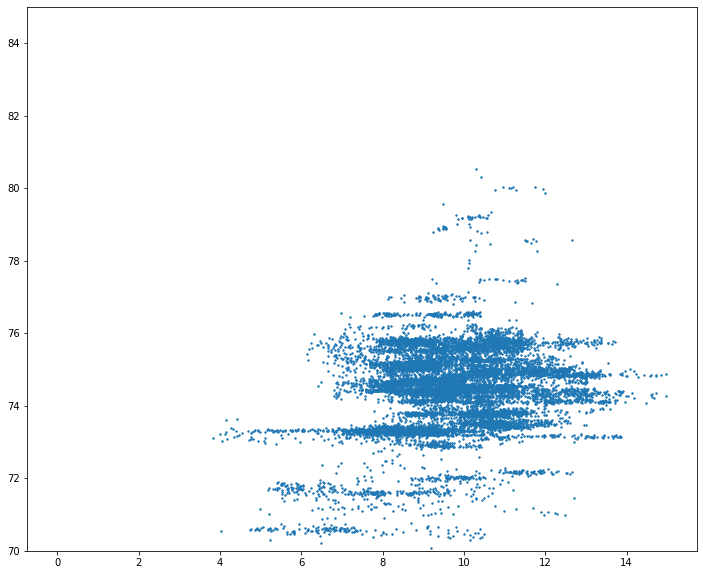

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(df['SPEED_VG'],df['ME1_RPM'],s=2)
plt.ylim(70,85) # Need to filter 70 value

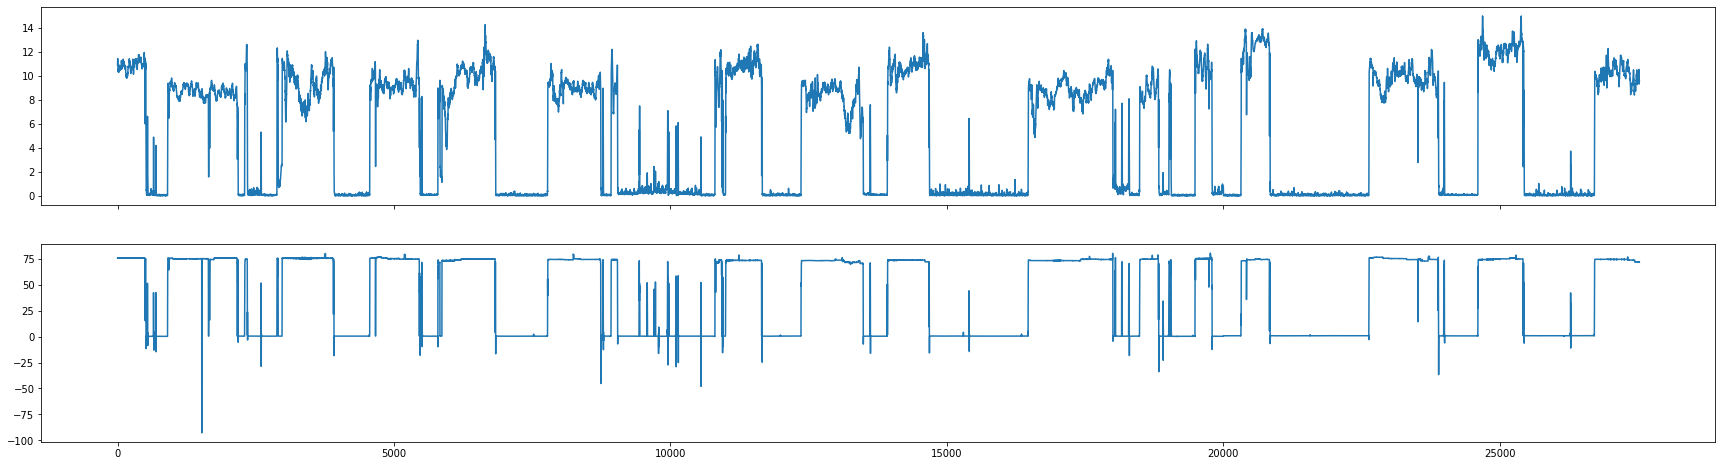

In [15]:
f, axes = plt.subplots(2, 1, figsize=(30, 8), sharex=True)
axes[0].plot(df['SPEED_VG'])
axes[1].plot(df['ME1_RPM'])

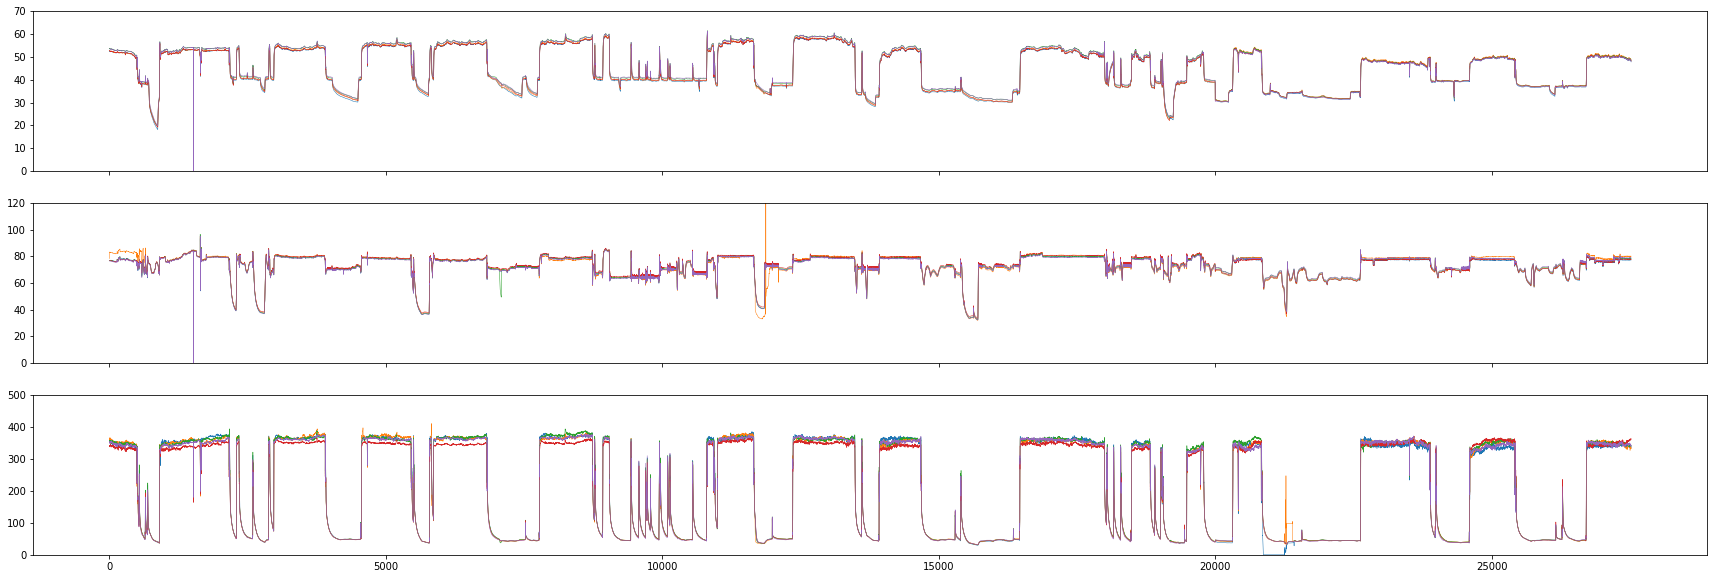

In [9]:
variables=['_PCO_OUTLET_TEMP','_CFW_OUTLET_TEMP','_EXH_GAS_OUTLET_TEMP']
yrange=[70,120,500]
f, axes = plt.subplots(3, 1, figsize=(30, 10), sharex=True)
for v in range(3):
    for i in range(1,6):
        column = f'ME1_CYL{i}'+variables[v]
        axes[v].plot(df[column],linewidth=0.5)    
    axes[v].set_ylim(0,yrange[v])   


In [119]:
list(df.columns)

['index',
 'TIME_STAMP',
 'LAT',
 'LON',
 'SPEED_VG',
 'SPEED_LG',
 'SPEED_TG',
 'SPEED_LW',
 'REL_WIND_DIR',
 'REL_WIND_SPEED',
 'COURSE_OVER_GROUND',
 'SHIP_HEADING',
 'WATER_DEPTH',
 'RUDDER_ANGLE',
 'DRAFT_FORE',
 'DRAFT_MID_PORT',
 'DRAFT_MID_STBD',
 'DRAFT_AFT',
 'SW_TEMP',
 'ME1_FO_FLOW_HOUR_INLET',
 'ME1_FO_DENSITY_INLET',
 'ME1_FO_TEMP_INLET',
 'ME1_FO_TOTALIZER_INLET',
 'GE_FO_FLOW_HOUR_INLET',
 'GE_FO_DENSITY_INLET',
 'GE_FO_TEMP_INLET',
 'GE_FO_TOTALIZER_INLET',
 'GE_FO_FLOW_HOUR_RETURN',
 'GE_FO_DENSITY_RETURN',
 'GE_FO_TEMP_RETURN',
 'GE_FO_TOTALIZER_RETURN',
 'ME1_RPM_ECC',
 'ME1_SCAV_AIR_PRESS_ECC',
 'ME1_RPM',
 'ME1_FO_INLET_PRESS',
 'ME1_FO_INLET_TEMP',
 'ME1_SCAV_AIR_PRESS',
 'ME1_CYL1_PCO_OUTLET_TEMP',
 'ME1_CYL2_PCO_OUTLET_TEMP',
 'ME1_CYL3_PCO_OUTLET_TEMP',
 'ME1_CYL4_PCO_OUTLET_TEMP',
 'ME1_CYL5_PCO_OUTLET_TEMP',
 'ME1_JCW_INLET_TEMP',
 'ME1_JCW_INLET_PRESS',
 'ME1_CYL1_CFW_OUTLET_TEMP',
 'ME1_CYL2_CFW_OUTLET_TEMP',
 'ME1_CYL3_CFW_OUTLET_TEMP',
 'ME1_CYL4_CFW_OUT

In [17]:
# Feature Selection
to_exclude=['ME1_FO_FLOW_HOUR_INLET','ME1_FO_DENSITY_INLET','ME1_FO_TEMP_INLET','ME1_FO_TOTALIZER_INLET','ME1_RPM_ECC','ME1_SCAV_AIR_PRESS_ECC']
columns=[i for i in df.columns if i.startswith('ME1') and i not in to_exclude]
columns

['ME1_RPM',
 'ME1_FO_INLET_PRESS',
 'ME1_FO_INLET_TEMP',
 'ME1_SCAV_AIR_PRESS',
 'ME1_CYL1_PCO_OUTLET_TEMP',
 'ME1_CYL2_PCO_OUTLET_TEMP',
 'ME1_CYL3_PCO_OUTLET_TEMP',
 'ME1_CYL4_PCO_OUTLET_TEMP',
 'ME1_CYL5_PCO_OUTLET_TEMP',
 'ME1_JCW_INLET_TEMP',
 'ME1_JCW_INLET_PRESS',
 'ME1_CYL1_CFW_OUTLET_TEMP',
 'ME1_CYL2_CFW_OUTLET_TEMP',
 'ME1_CYL3_CFW_OUTLET_TEMP',
 'ME1_CYL4_CFW_OUTLET_TEMP',
 'ME1_CYL5_CFW_OUTLET_TEMP',
 'ME1_CYL1_EXH_GAS_OUTLET_TEMP',
 'ME1_CYL2_EXH_GAS_OUTLET_TEMP',
 'ME1_CYL3_EXH_GAS_OUTLET_TEMP',
 'ME1_CYL4_EXH_GAS_OUTLET_TEMP',
 'ME1_CYL5_EXH_GAS_OUTLET_TEMP',
 'ME1_TC1_EXH_INLET_TEMP',
 'ME1_TC1_EXH_OUTLET_TEMP',
 'ME1_TC1_LO_INLET_PRESS',
 'ME1_TC1_LO_OUTLET_TEMP',
 'ME1_LO_INLET_PRESS',
 'ME1_LO_INLET_TEMP']

<AxesSubplot:>

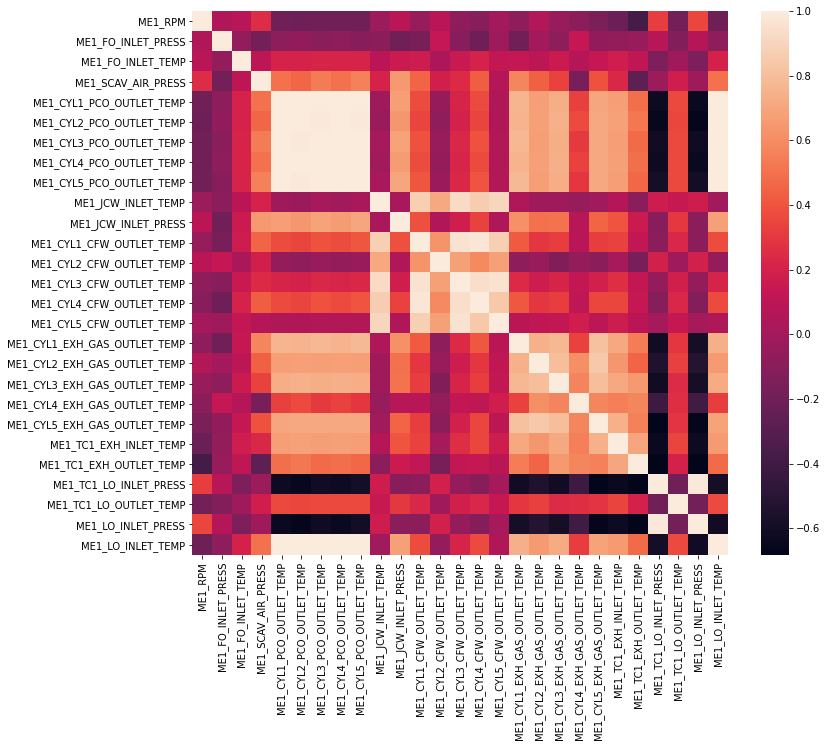

In [18]:
import seaborn as sns
df2=df[df['ME1_RPM']>70]
df2=df2[columns]
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr())

In [20]:
len(df2)

13944

In [19]:
df2

,ME1_RPM,ME1_FO_INLET_PRESS,ME1_FO_INLET_TEMP,ME1_SCAV_AIR_PRESS,ME1_CYL1_PCO_OUTLET_TEMP,ME1_CYL2_PCO_OUTLET_TEMP,ME1_CYL3_PCO_OUTLET_TEMP,ME1_CYL4_PCO_OUTLET_TEMP,ME1_CYL5_PCO_OUTLET_TEMP,ME1_JCW_INLET_TEMP,...,ME1_CYL2_EXH_GAS_OUTLET_TEMP,ME1_CYL3_EXH_GAS_OUTLET_TEMP,ME1_CYL4_EXH_GAS_OUTLET_TEMP,ME1_CYL5_EXH_GAS_OUTLET_TEMP,ME1_TC1_EXH_INLET_TEMP,ME1_TC1_EXH_OUTLET_TEMP,ME1_TC1_LO_INLET_PRESS,ME1_TC1_LO_OUTLET_TEMP,ME1_LO_INLET_PRESS,ME1_LO_INLET_TEMP
0,75.851224,7.430000,133.679592,1.552000,52.500000,52.700000,53.669388,52.624490,53.504082,69.540816,...,362.734694,354.320408,339.377551,350.855102,381.130612,268.589796,2.138000,61.383673,2.454000,48.204082
1,75.873167,7.465967,133.846667,1.556567,52.498333,52.700000,53.581667,52.675000,53.500000,69.500000,...,361.840000,355.810000,338.575000,353.500000,382.773333,268.708333,2.142933,61.365000,2.451633,48.201667
2,75.801667,7.332033,133.831667,1.553300,52.445000,52.700000,53.501667,52.648333,53.500000,69.500000,...,362.558333,356.738333,338.748333,350.505000,381.236667,268.681667,2.138033,61.335000,2.436933,48.200000
3,75.789167,7.366333,133.928333,1.553300,52.430000,52.676667,53.500000,52.546667,53.481667,69.500000,...,364.638333,352.471667,340.093333,350.506667,381.701667,269.123333,2.136400,61.320000,2.445100,48.175000
4,75.784833,7.443100,134.040000,1.541867,52.498333,52.700000,53.628333,52.685000,53.506667,69.548333,...,363.863333,352.745000,340.720000,348.903333,380.896667,269.131667,2.133133,61.445000,2.440200,48.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27518,72.009831,7.491186,139.066102,1.069695,48.188136,48.852542,48.715254,48.472881,48.333898,70.513559,...,334.315254,340.523729,363.508475,343.845763,383.891525,294.030508,2.069627,54.240678,2.396847,43.989831
27519,72.011333,7.454533,138.985000,1.087800,48.096667,48.810000,48.696667,48.323333,48.298333,70.271667,...,332.088333,339.971667,364.060000,343.021667,383.043333,292.171667,2.082500,54.311667,2.410800,43.868333
27520,72.004333,7.511700,139.043333,1.055133,47.921667,48.723333,48.535000,48.256667,48.225000,70.221667,...,334.110000,341.248333,360.461667,341.296667,382.618333,293.728333,2.126600,54.195000,2.430400,43.798333
27521,72.042833,7.482300,138.988333,1.040433,47.830000,48.630000,48.471667,48.208333,48.168333,70.335000,...,335.426667,339.813333,360.916667,339.151667,381.423333,293.736667,2.138033,54.046667,2.441833,43.746667
